In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [19]:
%matplotlib inline

In [2]:
now = datetime.now() # current date and time
start_date = '2010-01-01'
end_date = now.strftime("%Y-%m-%d")

aapl = yf.Ticker("AAPL")
df = aapl.history(start=start_date, end=end_date)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,6.556514,6.563282,6.477453,6.482683,352410800,0.0,0.0
2010-01-04,6.565743,6.598660,6.533442,6.583586,493729600,0.0,0.0
2010-01-05,6.601736,6.632191,6.560205,6.594968,601904800,0.0,0.0
2010-01-06,6.594967,6.621116,6.483298,6.490066,552160000,0.0,0.0
2010-01-07,6.514060,6.521751,6.431000,6.478067,477131200,0.0,0.0


In [33]:
def SMA(df, window):
    return df['Close'].rolling(window).mean()

In [34]:
df['SMA20'] = SMA(df, 20)

In [35]:
def EMA(df, window):
    return df['Close'].ewm(span=window, adjust=False).mean()

In [37]:
df['EMA20'] = SMA(df, 20)

In [38]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA20,EMA20
Date,,,,,,,,,
2021-02-03,135.557435,135.567429,133.410649,133.740158,89880900,0.000,0.0,133.318282,133.318282
2021-02-04,136.096628,137.194977,134.389172,137.184998,84183100,0.000,0.0,133.856977,133.856977
2021-02-05,137.350006,137.419998,135.860001,136.759995,75524000,0.205,0.0,134.158744,134.158744
2021-02-08,136.029999,136.960007,134.919998,136.910004,71297200,0.000,0.0,134.411596,134.411596
2021-02-09,136.619995,137.876999,135.850006,136.009995,76774213,0.000,0.0,134.772718,134.772718


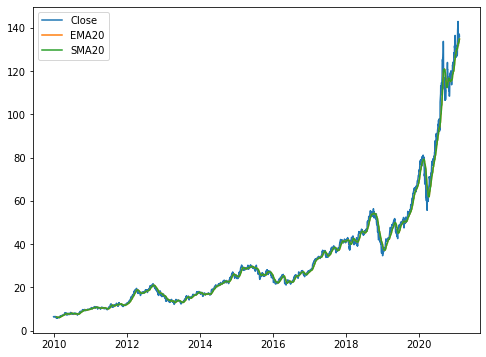

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(df[['Close', 'EMA20', 'SMA20']])
plt.legend(['Close', 'EMA20', 'SMA20']);

In [40]:
def MACD(df, short, long):
    shortEMA = EMA(df, short)
    longEMA = EMA(df, long)
    
    return shortEMA - longEMA

In [48]:
def C_EMA_RATIO(df, window):
    if 'EMA' + str(window) not in df.columns:
        df['EMA{}'.format(window)] = EMA(df, window)
        
    return df['Close'] / df['EMA{}'.format(window)]

In [49]:
df['C/S'] = C_EMA_RATIO(df, 20)

In [52]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA20,EMA20,C/S,EMA60,S/M,EMA120,L/M
Date,,,,,,,,,,,,,,
2021-02-03,135.557435,135.567429,133.410649,133.740158,89880900,0.000,0.0,133.318282,133.318282,1.003164,127.807257,1.043120,119.712190,1.067621
2021-02-04,136.096628,137.194977,134.389172,137.184998,84183100,0.000,0.0,133.856977,133.856977,1.024863,128.114724,1.044821,120.000997,1.067614
2021-02-05,137.350006,137.419998,135.860001,136.759995,75524000,0.205,0.0,134.158744,134.158744,1.019389,128.398175,1.044865,120.278005,1.067512
2021-02-08,136.029999,136.960007,134.919998,136.910004,71297200,0.000,0.0,134.411596,134.411596,1.018588,128.677252,1.044564,120.552914,1.067392
2021-02-09,136.619995,137.876999,135.850006,136.009995,76774213,0.000,0.0,134.772718,134.772718,1.009180,128.917669,1.045417,120.808403,1.067125


In [50]:
def EMA_RATIO(df, window1, window2):
    if 'EMA' + str(window1) not in df.columns:
        df['EMA{}'.format(window1)] = EMA(df, window1)
    if 'EMA' + str(window2) not in df.columns:
        df['EMA{}'.format(window2)] = EMA(df, window2)
        
    return df['EMA{}'.format(window1)]/df['EMA{}'.format(window2)]

In [51]:
df['S/M'] = EMA_RATIO(df, 20, 60)
df['L/M'] = EMA_RATIO(df, 60, 120)
